[![Open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nunososorio/SingleCellGenomics2024/blob/main/challenges/space_race_I.ipynb)


<img src="https://github.com/nunososorio/SingleCellGenomics2024/blob/main/logo.png?raw=true" alt="AnnData" style="width:600px; height:auto;"/>

## SINGLE CELL SPACE RACE I




Organize in teams.
Setup your environment running the code bellow

In [ ]:
!wget https://github.com/nunososorio/SingleCellGenomics2024/raw/main/challenges/Toy_data.h5ad
!pip install scanpy loompy umap-learn scrublet louvain > _
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import scrublet as scr
import loompy
import os
adata=sc.read_h5ad('Toy_data.h5ad')

Visit https://b.socrative.com/login/student/

Enter NSO in the room name and wait for the questions to show (one login per team)

## How many cells are there in the dataset? How many genes are there in the dataset?

In [33]:
adata

AnnData object with n_obs × n_vars = 5887 × 126
    obs: 'barcode', 'Sample_name', 'Condition'
    var: 'var_names'

In [39]:
adata.var_names

Index(['PDGFRA', 'APOE', 'UCHL1', 'LMNB1', 'PAX3', 'MMP9', 'MYC', 'ZBTB16',
       'ZFY', 'PTPN11',
       ...
       'SLC1A3', 'SMAD4', 'NDUFS4', 'CUX2', 'VCAN', 'VDR', 'TGFB1', 'GATA3',
       'BMPR2', 'CTNNA3'],
      dtype='object', length=126)

## How many samples are there in the dataset?

In [52]:
adata.obs.Sample_name.nunique()
#adata.obs['Sample_name'].nunique()


10

In [53]:
adata.obs.Sample_name.value_counts()

C7     954
D4     913
D6     785
C10    755
D3     633
D8     602
D1     529
D9     337
D2     261
D5     118
Name: Sample_name, dtype: int64

In [54]:
len(adata.obs.Sample_name.value_counts())

10

## What percentage of cells would you discard based on the analsis of the n_counts (total gene expression counts) vs. n_genes (number of expressed genes) plot?

<img src="https://falexwolf.de/img/scanpy/anndata.svg" alt="AnnData" style="width:600px; height:auto;"/>

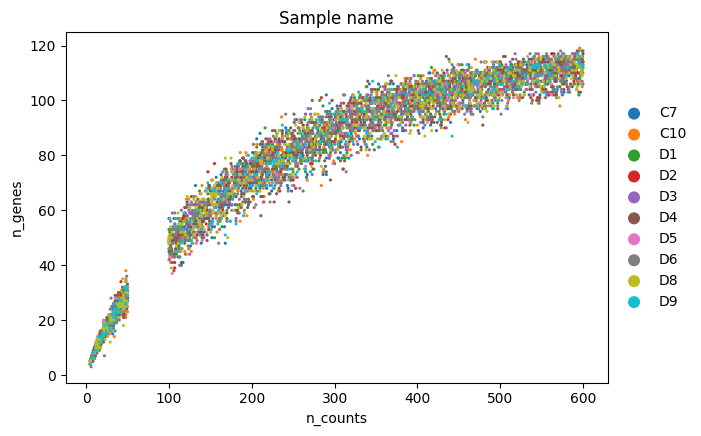

11.788686937319518

In [38]:
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['n_genes'] = (adata.X > 0).sum(1)
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='Sample_name')
adata[adata.obs.n_counts<100].n_obs/adata.n_obs*100

## In the context of Principal Component Analysis (PCA) applied to your dataset, how many Principal Components (PCs) appear to be relevant for further analysis?

Hints:

Remember to apply the Quality Control (QC) criteria to your data before performing PCA (min_counts = 100, max_counts = 50000, min_genes = 40, max_genes = 7000). There is no need for normalization or log-transformation in this case.

Consider the top 20 most highly variable genes.

Number of cells after min count filter: 5189
Number of cells after max count filter: 5189
Number of cells after gene filter: 5189
Number of cells after gene filter: 5189


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


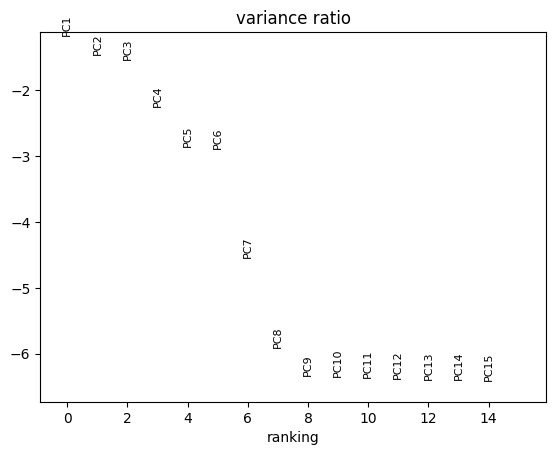

In [64]:
sc.pp.filter_cells(adata, min_counts = 100) #Playing conservative with this one
print('Number of cells after min count filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 50000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 40) # Would go for 1000 but might cut out too many cells
print('Number of cells after gene filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_genes = 7000) # Would go for 1000 but might cut out too many cells
print('Number of cells after gene filter: {:d}'.format(adata.n_obs))

n_pcs=15
sc.pp.pca(adata, n_comps=n_pcs, use_highly_variable=True, svd_solver='arpack',random_state=666)
sc.pl.pca_variance_ratio(adata, n_pcs, log=True)